## Steps to implement YOLO v3

1. Clone repo and install dependencies
2. Update the architecture file based on the dataset 
3. Load and Preprocess Data

4. Arrange Data in required format
5. Train the model


## 1. Installing Required Libraries

In [ ]:
# download the library ultralytics
!git clone https://github.com/ultralytics/yolov3

fatal: destination path 'yolov3' already exists and is not an empty directory.


## 2. Update Architecture file as per dataset

In [ ]:
# go to folder yolov3
%cd yolov3

/content/yolov3


## 3. Loading Dataset from Drive

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip data
!unzip '/content/drive/MyDrive/train_zedkk38-200624-203536.zip'

Archive:  /content/drive/MyDrive/train_zedkk38-200624-203536.zip
replace images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Loading and Cleaning Data

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd

from PIL import Image

In [ ]:
# reading train file 
train = pd.read_csv('train.csv')

In [ ]:
# data cleaning

## keeping WBC and RBC only
train['cell_type'] = train['cell_type'].replace({'RBC': 0, 'WBC': 1})
train = train.loc[(train['cell_type'] == 0) | (train['cell_type'] == 1)]

In [ ]:
train.head()

,image_names,cell_type,xmin,xmax,ymin,ymax
0,1.jpg,0,68,165,154,249
1,1.jpg,0,1,66,145,260
2,1.jpg,0,207,334,160,270
3,1.jpg,0,435,540,347,437
4,1.jpg,0,535,639,356,464


## 4. Converting Data Files into Required Structure

In [ ]:
# creating folder for labels
!mkdir labels

mkdir: cannot create directory ‘labels’: File exists


In [ ]:
# loading data

for image_name in train.image_names.unique():

    # separate labels for each image
    image_metadata = train[train.image_names == image_name].copy()

    # x-center, y-center, height and width for bounding box
    image_metadata['x_center'] = (image_metadata['xmax'] + image_metadata['xmin']) / 2
    image_metadata['y_center'] = (image_metadata['ymax'] + image_metadata['ymin']) / 2
    image_metadata['width'] = (image_metadata['xmax'] - image_metadata['xmin'])
    image_metadata['height'] = (image_metadata['ymax'] - image_metadata['ymin'])

    im_width, im_height = Image.open('images/' + image_name).size

    # normalizing bounding box values
    image_metadata['x_center'] = image_metadata['x_center']/im_width
    image_metadata['width'] = image_metadata['width']/im_width
    image_metadata['y_center'] = image_metadata['y_center']/im_height
    image_metadata['height'] = image_metadata['height']/im_height

    image_metadata[['cell_type', 'x_center', 'y_center', 'width', 'height']].to_csv('labels/' + image_name.split('.')[0] + '.txt', index=False, header=None, sep=" ")

In [ ]:
# file containing train image names
bloodCellDet_train = train.image_names.apply(lambda x: '/content/yolov3/images/' + x).unique()
np.savetxt("bloodCellDet_train.txt", bloodCellDet_train, fmt="%s")

In [ ]:
# print content of the file 
!cat bloodCellDet_train.txt

In [ ]:
# create file with class names
with open('bloodCellDet.names', 'w') as f:
    f.write('RBC\nWBC')

In [ ]:
!cat bloodCellDet.names

RBC
WBC

In [ ]:
# data file with class count and paths
with open('bloodCellDet.data', 'w') as f:
    f.write('classes=2\ntrain=/content/yolov3/bloodCellDet_train.txt\nvalid=/content/yolov3/bloodCellDet_val.txt\nnames=/content/yolov3/bloodCellDet.names')

In [ ]:
!cat bloodCellDet.data

classes=2
train=/content/yolov3/bloodCellDet_train.txt
valid=/content/yolov3/bloodCellDet_val.txt
names=/content/yolov3/bloodCellDet.names

## Training the Model

In [ ]:
!python3 train.py --img 320 --batch 16 --epochs 15 --data bs128.yaml --weights yolov3.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 2
wandb: You chose 'Use an existing W&B account'
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=yolov3.pt, cfg=, data=bs128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=15, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_p

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

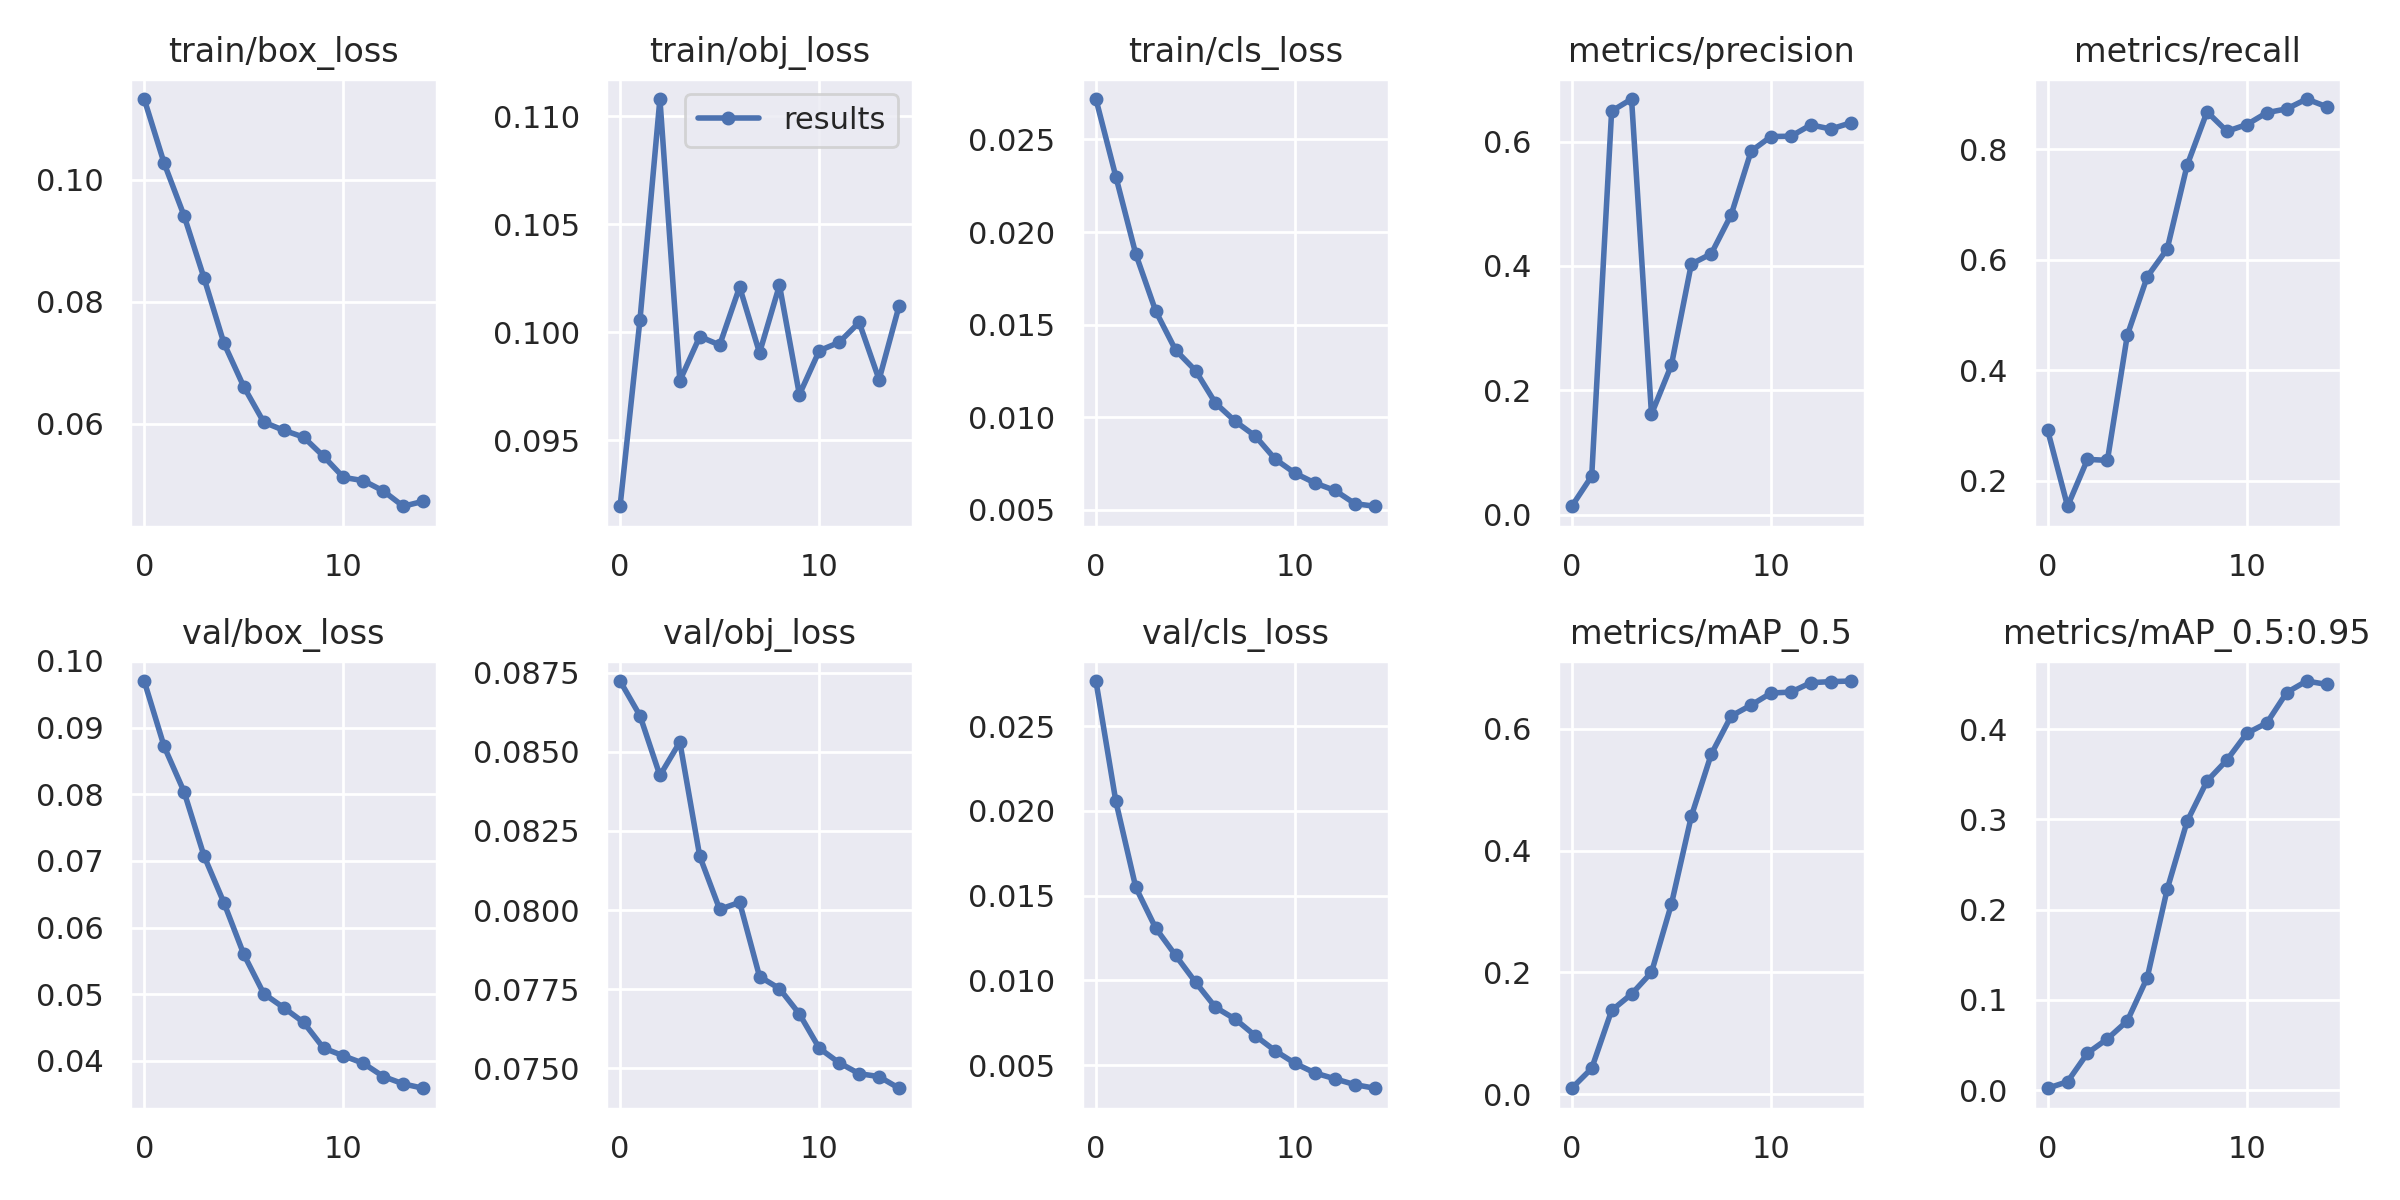

In [ ]:
results = cv2.imread('/content/yolov3/runs/train/exp3/results.png')
cv2_imshow(results)

In [ ]:
sample = cv2.imread('/content/yolov3/runs/train/exp3/train_batch1.jpg')

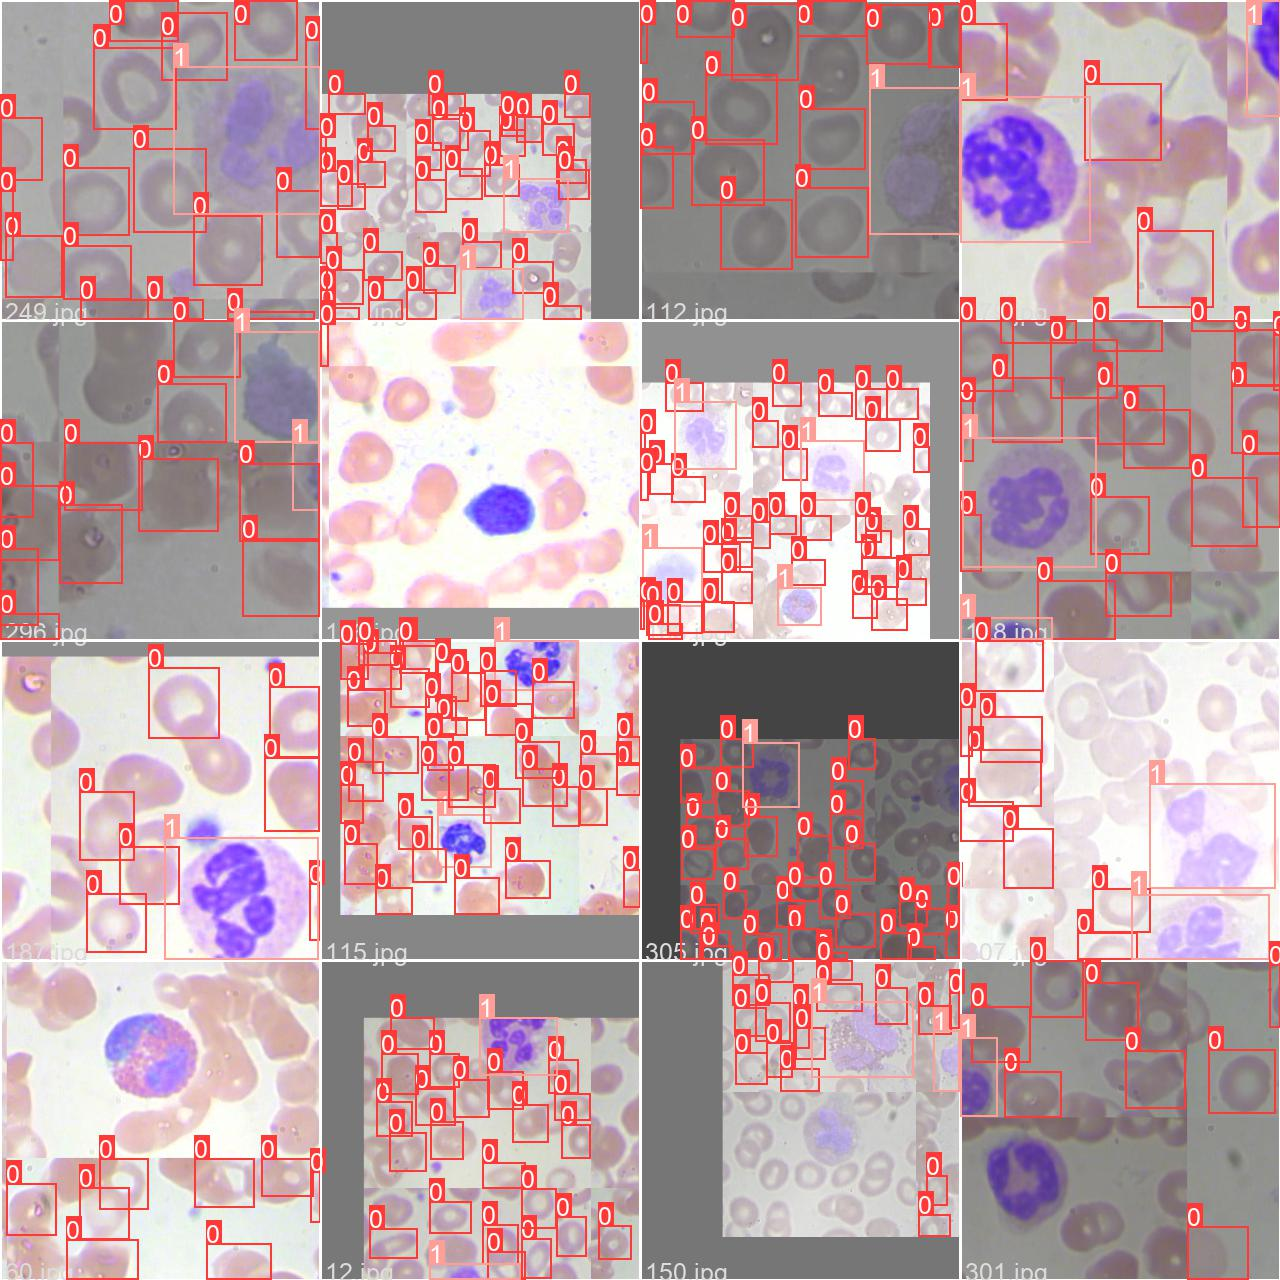

In [ ]:
cv2_imshow(sample)